In [2]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MaxNLocator, ScalarFormatter

In [3]:
# Configuración del directorio actual y del directorio de utilidades
current_dir = os.getcwd()
utilities_dir = os.path.join(current_dir, '../../utils')
sys.path.insert(0, utilities_dir)
from plotting import *  # Importar utilidades de trazado personalizadas

In [4]:
# Leer los archivos CSV, especificando que el delimitador es una coma y saltar las primeras líneas
df_ml = pd.read_csv('Scopus-10-Analyze-Year-Machine-Learning.csv', skiprows=6, delimiter=',')
df_nm = pd.read_csv('Scopus-10-Analyze-Year - Numerical Methods.csv', skiprows=6, delimiter=',')
df_nm_ml = pd.read_csv('Scopus-10-Analyze-Year - Numerical Methods and Machine Learning.csv', skiprows=6, delimiter=',')
df_waves = pd.read_csv('Scopus-50-Analyze-Year-Waves.csv', skiprows=6, delimiter=',')
df_total = pd.read_csv('Scopus-50-Analyze-Year-Total.csv', skiprows=6, delimiter=',')

In [5]:
# Extraer los datos de las columnas
years_ml = df_ml.iloc[:, 0].tolist()
works_ml = df_ml.iloc[:, 1].tolist()
years_nm = df_nm.iloc[:, 0].tolist()
works_nm = df_nm.iloc[:, 1].tolist()
years_nm_ml = df_nm_ml.iloc[:, 0].tolist()
works_nm_ml = df_nm_ml.iloc[:, 1].tolist()
years_waves = df_waves.iloc[:, 0].tolist()
works_waves = df_waves.iloc[:, 1].tolist()
years_total = df_total.iloc[:, 0].tolist()
works_total = df_total.iloc[:, 1].tolist()

In [6]:
# Crear diccionarios de datos
data_ml = {
    'YEAR': years_ml,
    'WORKS': works_ml
}

data_nm = {
    'YEAR': years_nm,
    'WORKS': works_nm
}

data_nm_ml = {
    'YEAR': years_nm_ml,
    'WORKS': works_nm_ml
}

data_waves = {
    'YEAR': years_waves,
    'WORKS': works_waves
}

data_total = {
    'YEAR': years_total,
    'WORKS': works_total
}

# Crear diccionario de datos relativos
data_relative_ml = {
    'YEAR': data_ml['YEAR'],
    'WORKS': np.array(data_ml['WORKS']) / np.array(data_total['WORKS'])
}

data_relative_nm = {
    'YEAR': data_nm['YEAR'],
    'WORKS': np.array(data_nm['WORKS']) / np.array(data_total['WORKS'])
}


data_relative_nm_ml = {
    'YEAR': data_nm_ml['YEAR'],
    'WORKS': np.array(data_nm_ml['WORKS']) / np.array(data_total['WORKS'])
}

 
data_relative_waves = {
    'YEAR': data_waves['YEAR'],
    'WORKS': np.array(data_waves['WORKS']) / np.array(data_total['WORKS'])
}

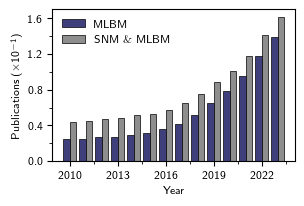

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator, ScalarFormatter
import numpy as np

# Configuración de la figura
color = '#3f407bff'
color_2 = '#8e8e8eff'  # Blanco
edge_color_2 = '#3f407bff'  # Bordes azules

width_in_inches = 80 / 25.4
height_in_inches = 55 / 25.4
plt.figure(figsize=(width_in_inches, height_in_inches))

# Ancho de las barras
bar_width = 0.4

# Posiciones de las barras
years = np.array(data_relative_nm['YEAR'])
years_offset = years + bar_width

# Trazado de datos relativos como un barplot con un rojo más oscuro
plt.bar(years, data_relative_nm_ml['WORKS'], width=bar_width, color=color, edgecolor='black', linewidth=0.5, alpha=1.0, label='MLBM')
plt.bar(years_offset, data_relative_nm['WORKS'], width=bar_width, color=color_2, edgecolor='black', linewidth=0.5, alpha=1.0, label=r'SNM $\&$ MLBM')
plt.ylabel(r'Publications ($\mathsf{\times 10^{-1}}$)', color=color)
plt.xlabel('Year', color=color)

# Configuración del eje principal
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Asegurar 4 marcas principales en el eje y
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Configurar el color de todos los ejes, ticks y labels
ax.tick_params(axis='y', colors='black')
ax.tick_params(axis='y', which='minor', colors='black')
ax.yaxis.label.set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='x', which='minor', colors='black')
ax.xaxis.label.set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# Configuración de los años seleccionados en el eje x
selected_years = np.array([2010, 2013, 2016, 2019, 2022])
plt.xticks(selected_years + bar_width / 2, selected_years, color='black')
plt.yticks([0.0,0.04,0.08,0.12,0.16],[0.0,0.4,0.8,1.2,1.6], color='black')

# Configurar la fuente sans-serif para el offset text
ax.yaxis.get_offset_text().set_color('black')

# Incluir la leyenda
plt.legend(frameon=False)

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('publications_nm_ml.pdf')
plt.show()

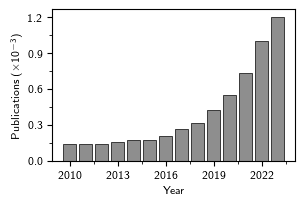

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator, ScalarFormatter
from matplotlib.font_manager import FontProperties

color = '#8e8e8eff'

# Configuración de la figura
width_in_inches = 80 / 25.4
height_in_inches = 55 / 25.4
plt.figure(figsize=(width_in_inches, height_in_inches))

# Trazado de datos relativos como un barplot con un rojo más oscuro
plt.bar(data_relative_waves['YEAR'], data_relative_waves['WORKS'], edgecolor='black', linewidth=0.5, color=color, alpha=1.0, label='Relative')
plt.ylabel(r'Publications ($\mathsf{\times 10^{-3}}$)', color=color)
plt.xlabel('Year', color=color)

# Configuración del eje principal
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=2))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Asegurar 4 marcas principales en el eje y
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

# Configurar el color de todos los ejes, ticks y labels
ax.tick_params(axis='y', colors='black')
ax.tick_params(axis='y', which='minor', colors='black')
ax.yaxis.label.set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='x', which='minor', colors='black')
ax.xaxis.label.set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')

# Configuración de los años seleccionados en el eje x
selected_years = np.array([2010, 2013, 2016, 2019, 2022])
plt.xticks(selected_years,selected_years, color='black')
plt.yticks([0.000,0.0003,0.0006,0.0009,0.0012],[0.0,0.3,0.6,0.9,1.2], color='black')

 

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('publications_waves.pdf')
plt.show()

In [9]:
np.array([2010, 2013, 2016, 2019, 2022])

array([2010, 2013, 2016, 2019, 2022])